# Redes Neurais - Perceptron de camada única
## Conforme transparência apresentada pelo professor segue a implementação descritiva dos ciclos do treinamento do perceptron de camada única, baseado na regra Hebb, para o problema da função AND.

## Dataset

In [161]:
import numpy as np

dataset = np.array([[1, 0, 0, 0],
                    [1, 0, 1, 0],
                    [1, 1, 0, 0],
                    [1, 1, 1, 1]])
w = np.zeros(3)
eta = 0.5

x = dataset[:, :-1]
t = dataset[:, -1]

## Funções

In [162]:
def net(x, w):
    return np.dot(x, w)

def degrau(u):
    return 1 if u > 0 else 0

def saida(x, w):
    return degrau(net(x, w))

def ajusteW(w, eta, t, y, x):
    return w + eta * (t - y) * x

## Treinamento

In [163]:
erro = True
ciclo = 1
epoca = 1
while erro:
    print(ciclo, 'º Ciclo')
    erro = False
    for i in range(len(x)):
        y = saida(x[i], w)
        if y != t[i]:
            w = ajusteW(w, eta, t[i], y, x[i])
            erro = True
            print('Época ', epoca, ': entrada ', i, ' - pesos ajustados:', w)
        else:
            print('Época ', epoca, ': entrada ', i, ' - pesos OK!')
        epoca += 1
    ciclo += 1

print('\nPesos ótimos: ', w)

1 º Ciclo
Época  1 : entrada  0  - pesos OK!
Época  2 : entrada  1  - pesos OK!
Época  3 : entrada  2  - pesos OK!
Época  4 : entrada  3  - pesos ajustados: [0.5 0.5 0.5]
2 º Ciclo
Época  5 : entrada  0  - pesos ajustados: [0.  0.5 0.5]
Época  6 : entrada  1  - pesos ajustados: [-0.5  0.5  0. ]
Época  7 : entrada  2  - pesos OK!
Época  8 : entrada  3  - pesos ajustados: [0.  1.  0.5]
3 º Ciclo
Época  9 : entrada  0  - pesos OK!
Época  10 : entrada  1  - pesos ajustados: [-0.5  1.   0. ]
Época  11 : entrada  2  - pesos ajustados: [-1.   0.5  0. ]
Época  12 : entrada  3  - pesos ajustados: [-0.5  1.   0.5]
4 º Ciclo
Época  13 : entrada  0  - pesos OK!
Época  14 : entrada  1  - pesos OK!
Época  15 : entrada  2  - pesos ajustados: [-1.   0.5  0.5]
Época  16 : entrada  3  - pesos ajustados: [-0.5  1.   1. ]
5 º Ciclo
Época  17 : entrada  0  - pesos OK!
Época  18 : entrada  1  - pesos ajustados: [-1.   1.   0.5]
Época  19 : entrada  2  - pesos OK!
Época  20 : entrada  3  - pesos OK!
6 º Cicl

## Visualização da otimização

ValueError: cannot reshape array of size 640000 into shape (400,400)

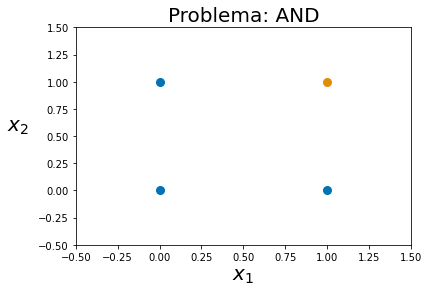

In [164]:
# Plota os dados
import seaborn as sns
x = dataset[:, 1:-1]

pal = sns.color_palette('colorblind', 3)
fig, ax = plt.subplots(1)
xmin = min(x[:,0]) - 0.5
xmax = max(x[:,0]) + 0.5
ymin = min(x[:,1]) - 0.5
ymax = max(x[:,1]) + 0.5
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.set_title('Problema: {}'.format('AND'), fontsize=20)
ax.set_xlabel('$x_1$', fontsize=20)
h = ax.set_ylabel('$x_2$', fontsize=20, labelpad=20)
h.set_rotation(0)

# Plota os pontos de cada classe
lgClass0 = None
lgClass1 = None
for x, y in zip(x, t):
    if y == 0:
        color = pal[0]
    else:
        color = pal[1]
    obj, = ax.plot([x[0]], [x[1]], c=color, marker='o', markersize=8,
                                    linestyle='None')
    if y == 0:
        lgClass0 = obj
    else:
        lgClass1 = obj

# Plota a fronteira de separação (isto é, o hiperplano definido pelos pesos)
# Para isso, usa uma grade de valores previstos com o próprio classificador
# treinado a partir dos dados

h = 0.005 # Tamanho dos "passos" para a grade a ser criada
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

Z = []
for x in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(t)

Z = np.array(Z).reshape(xx.shape)
CS = ax.contour(xx, yy, Z, colors=[pal[2]])
#ax.axis('off')

label = 'Hiperplano separador ($w = [{:.2f}, {:.2f}]$, $b = {:.2f}$)'
ax.legend([lgClass0, lgClass1, CS.collections[0]],
        ['Classe A', 'Classe B', label.format(w[1], w[2])],
        ncol=3, loc='upper right', prop={'size': 12})

plt.show()